In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

# preprocessing
import re
import string 
import itertools # for flattening

# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from langdetect import detect
from nltk.util import ngrams

from wordcloud import WordCloud

nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pyLDAvis.sklearn

import pickle
from pprint import pprint

# Gensim package for topic modeling

import gensim, spacy, logging, warnings
from gensim import corpora
from gensim import models
from gensim.models import LdaModel, LdaMulticore
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
import matplotlib.colors as mcolors
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# prince package

import prince

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\jocel\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's docu

In [2]:
# fallout 3 dataframe

fallout3_df = pd.read_pickle("fallout3_df.pkl")
fallout3_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869610,"{'steamid': '76561199093429889', 'num_games_ow...",spanish,Excelente juego.,1675085335,1675085335,True,0,0,0,0,False,False,False,True,
1,131840023,"{'steamid': '76561198274686747', 'num_games_ow...",english,The best game of all time. Don't believe me? P...,1675038034,1675038034,True,0,0,0,0,False,False,False,True,
2,131775968,"{'steamid': '76561198330235225', 'num_games_ow...",english,i like that it is an open world game that you ...,1674966653,1674966653,True,0,0,0,0,True,False,False,True,
3,131731950,"{'steamid': '76561199165748096', 'num_games_ow...",english,"I fucking love this game, its one of my childh...",1674919157,1674919157,True,0,0,0,0,False,False,False,True,
4,131701621,"{'steamid': '76561198213474099', 'num_games_ow...",english,All time great!,1674884430,1674884430,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,668087,"{'steamid': '76561197974873880', 'num_games_ow...",english,"RPG of the year, one of the best.",1290240675,1290240675,True,0,0,0,0,True,False,False,False,
17962,342975,"{'steamid': '76561197969185804', 'num_games_ow...",english,"recent, beau et fun quand meme, meme si ce n'e...",1290197601,1290197601,True,0,0,0,0,False,False,False,False,
17963,323113,"{'steamid': '76561197968593024', 'num_games_ow...",english,"Great FPS/RPG with non-linear gameplay, huge o...",1290191053,1385409267,True,0,0,0,0,False,False,False,False,
17964,942919,"{'steamid': '76561197982681995', 'num_games_ow...",english,The best part of the game is off the beaten pa...,1287542096,1385412538,True,0,0,0,0,True,False,False,False,


In [3]:
# changing boolean voted up column to cardinal 0 (False) and 1 (True)

fallout3_df["voted_up"] = fallout3_df["voted_up"].replace([True, False], [1, 0])

In [4]:
# fallout 3 goty edition 

fallout3_goty = pd.read_pickle("fallout3_goty_df.pkl")
fallout3_goty

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131859880,"{'steamid': '76561198101119780', 'num_games_ow...",english,would be great if i could play it,1675070551,1675070551,False,0,0,0,0,True,False,False,True,
1,131855221,"{'steamid': '76561198414536948', 'num_games_ow...",french,Un jeu top top top !\nMerci Bethesda !,1675062663,1675062663,True,0,0,0,0,False,False,False,True,
2,131852248,"{'steamid': '76561199114521611', 'num_games_ow...",english,This is the best game Fallout game i ever play...,1675057289,1675057289,True,0,0,0,0,True,False,False,True,
3,131851056,"{'steamid': '76561198282884527', 'num_games_ow...",english,if you you like words and perfectly understand...,1675055300,1675055794,True,0,1,0,0,True,False,False,True,
4,131849781,"{'steamid': '76561199110657479', 'num_games_ow...",english,Good game if your machine can run it. Mine can't,1675053112,1675053112,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19494,47953954,"{'steamid': '76561198038579656', 'num_games_ow...",russian,"Игрушка очень впечатляет) Атмосфера, графика, ...",1546170659,1546170659,True,0,0,0,0,True,False,False,False,
19495,47950695,"{'steamid': '76561198079413178', 'num_games_ow...",english,7/10,1546160985,1546160985,True,0,1,0.438300758600234985,0,True,False,False,False,
19496,47947720,"{'steamid': '76561198213349023', 'num_games_ow...",english,I'm not going to go into depth about how this ...,1546150852,1546150852,True,2,0,0.52173912525177002,0,True,False,False,False,
19497,47946583,"{'steamid': '76561198151845107', 'num_games_ow...",russian,[b]Один скажет:[/b] [h1]ПРИВЕТ[/h1]\n[b]Миллио...,1546147170,1546147170,True,31,17,0.621355116367340088,4,True,False,False,False,


In [5]:
# changing boolean voted up column to cardinal 0 (False) and 1 (True)

fallout3_goty["voted_up"] = fallout3_goty["voted_up"].replace([True, False], [1, 0])

In [6]:
# fallout 4 dataframe

fallout4_df = pd.read_pickle("fallout4_df.pkl")
fallout4_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869596,"{'steamid': '76561198192323321', 'num_games_ow...",english,"fallout + ibuprofen, try my recipe.",1675085311,1675085311,True,0,0,0,0,True,False,False,True,
1,131868427,"{'steamid': '76561199152161988', 'num_games_ow...",english,i mean its ok mods are fun\n,1675083772,1675083772,True,0,0,0,0,True,False,False,True,
2,131868150,"{'steamid': '76561199068760027', 'num_games_ow...",schinese,一款好游戏，但不是一款好辐射\n但对新手友善\n挺易上手,1675083388,1675083388,True,0,0,0,0,True,False,False,True,
3,131867209,"{'steamid': '76561199055352893', 'num_games_ow...",brazilian,nao e melhor que fallout new vegas e o 3 ou at...,1675082149,1675082149,True,0,0,0,0,True,False,False,True,
4,131866936,"{'steamid': '76561198804370013', 'num_games_ow...",english,loading takes so long that it might take almos...,1675081755,1675081755,False,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87494,80901264,"{'steamid': '76561198097749509', 'num_games_ow...",english,"Not a great fallout game, but its Minecraft wi...",1606583808,1606583808,True,0,0,0,0,True,False,False,False,
87495,80900869,"{'steamid': '76561198079386093', 'num_games_ow...",english,"So much to do, see and explore in this very de...",1606583674,1606583863,True,0,0,0,0,False,False,False,False,
87496,80900738,"{'steamid': '76561199017541192', 'num_games_ow...",english,its great but don't delete your save like i di...,1606583628,1606583628,True,1,0,0.523809552192687988,0,True,False,False,False,
87497,80900166,"{'steamid': '76561198447753145', 'num_games_ow...",english,yes\n,1606583435,1606583435,True,0,0,0,0,True,False,False,False,


In [7]:
# changing boolean voted up column to cardinal 0 (False) and 1 (True)

fallout4_df["voted_up"] = fallout4_df["voted_up"].replace([True, False], [1, 0])

In [8]:
# fallout 76 dataframe

fallout76_df = pd.read_pickle("fallout76_df.pkl")
fallout76_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location,timestamp_dev_responded,developer_response
0,131873216,"{'steamid': '76561199386811559', 'num_games_ow...",schinese,一直卡在登录，谢谢你76,1675089523,1675089523,True,0,0,0,0,True,False,False,True,,NaN,NaN
1,131871410,"{'steamid': '76561198026220512', 'num_games_ow...",english,Horrible server issues. Game gets patched and ...,1675087415,1675087415,False,1,0,0,0,True,False,False,True,,NaN,NaN
2,131870128,"{'steamid': '76561198212538333', 'num_games_ow...",english,i really like this game its very best game,1675085989,1675085989,True,0,0,0,0,False,False,False,True,,NaN,NaN
3,131869816,"{'steamid': '76561198268833112', 'num_games_ow...",schinese,没有梯子不配玩你b社游戏是不,1675085589,1675085987,False,1,0,0,0,False,False,False,True,,NaN,NaN
4,131867821,"{'steamid': '76561198014432337', 'num_games_ow...",russian,Плохо что мало беспредела с нападением на игро...,1675082972,1675082972,True,0,0,0,0,True,False,False,True,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44294,81223704,"{'steamid': '76561198089495354', 'num_games_ow...",russian,Вест вирджиния маунтин мама.,1606745281,1606745281,True,2,1,0.523265659809112549,0,False,False,False,False,,NaN,NaN
44295,81223484,"{'steamid': '76561198046103466', 'num_games_ow...",tchinese,連線品質不穩定，但還算佳作,1606745187,1606745187,True,0,0,0,0,True,False,False,False,,NaN,NaN
44296,81223334,"{'steamid': '76561198420754027', 'num_games_ow...",english,less whack,1606745113,1662926831,True,0,0,0.476190477609634399,0,True,False,False,False,,NaN,NaN
44297,81222353,"{'steamid': '76561198038262659', 'num_games_ow...",russian,War Never Changes,1606744679,1606744679,True,0,0,0.499405473470687866,0,True,False,False,False,,NaN,NaN


In [9]:
# changing boolean voted up column to cardinal 0 (False) and 1 (True)

fallout76_df["voted_up"] = fallout76_df["voted_up"].replace([True, False], [1, 0])

In [10]:
# fallout new vegas dataframe

falloutNV_df = pd.read_pickle("falloutNV_df.pkl")
falloutNV_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131860607,"{'steamid': '76561199182441841', 'num_games_ow...",english,legion sucks,1675071840,1675071840,True,0,0,0.476190477609634399,0,True,False,False,True,
1,131860351,"{'steamid': '76561198824317187', 'num_games_ow...",english,very fun game,1675071391,1675071391,True,0,0,0,0,True,False,False,True,
2,131857518,"{'steamid': '76561198143817113', 'num_games_ow...",latam,"Graficamente es lo peor que he visto, pero el ...",1675066806,1675066806,True,0,0,0,0,True,False,False,True,
3,131857210,"{'steamid': '76561199080631340', 'num_games_ow...",english,Hi im Ricky Bobby and if you dont play new ve...,1675066227,1675066227,True,0,0,0,0,True,False,False,True,
4,131856549,"{'steamid': '76561198121608041', 'num_games_ow...",english,play this if you want to experience a true sto...,1675065063,1675065063,True,0,0,0,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93794,60341818,"{'steamid': '76561198331743288', 'num_games_ow...",english,This Game is really Fun for People who like Po...,1577045581,1604870663,True,1,0,0,0,True,False,False,False,
93795,60341351,"{'steamid': '76561198418430608', 'num_games_ow...",english,TIT\n,1577045145,1577045145,True,0,0,0,0,True,False,False,False,
93796,60339980,"{'steamid': '76561198161559948', 'num_games_ow...",english,"My favorite game of all time, hands down",1577043711,1577043711,True,0,1,0,0,True,False,False,False,
93797,60337307,"{'steamid': '76561198099478776', 'num_games_ow...",english,Its a fookin banger m8,1577041023,1577041023,True,1,0,0,2,True,False,False,False,


In [11]:
# changing boolean voted up column to cardinal 0 (False) and 1 (True)

falloutNV_df["voted_up"] = falloutNV_df["voted_up"].replace([True, False], [1, 0])

In [12]:
# fallout shelter dataframe

falloutS_df = pd.read_pickle("falloutS_df.pkl")
falloutS_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,131869733,"{'steamid': '76561199402685960', 'num_games_ow...",schinese,个人认为辐射 避难所的玩法并不新，但是游戏内角色机制的设置较为合理，低配也可以过难关，而且肝...,1675085490,1675085490,True,0,0,0,0,False,False,False,True,
1,131868708,"{'steamid': '76561199076674519', 'num_games_ow...",russian,Нет,1675084164,1675084164,True,0,0,0,0,False,False,False,True,
2,131863448,"{'steamid': '76561198992306293', 'num_games_ow...",russian,Норм я проиграл но все равно норм,1675076596,1675076596,True,0,0,0,0,False,False,False,True,
3,131858338,"{'steamid': '76561198055094309', 'num_games_ow...",russian,"Хорошая игра. Иногда зайти, что то сделать и п...",1675068190,1675068190,True,0,0,0,0,False,False,False,True,
4,131855620,"{'steamid': '76561199407314568', 'num_games_ow...",schinese,好玩休闲的时候来一下诶嘿就很舒服,1675063413,1675063413,True,0,0,0,0,False,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56072,30814079,"{'steamid': '76561198094714000', 'num_games_ow...",schinese,终于出在steam上了，感谢各位提醒~好评~,1490796742,1491148479,True,20,6,0.739851236343383789,7,False,False,False,False,
56073,30814067,"{'steamid': '76561198048801719', 'num_games_ow...",koreana,나오자 마자 다운 받고선 실행을 해보니 실행이 되질 않았다.\n\n폴더를 확인해보니...,1490796709,1490796709,True,7,22,0.369966328144073486,0,False,False,False,False,
56074,30814014,"{'steamid': '76561198030086276', 'num_games_ow...",russian,Toad Guvert - Ге(ни)й!,1490796525,1490796525,True,4,3,0.475161999464035034,1,False,False,False,False,
56075,30813605,"{'steamid': '76561198069159901', 'num_games_ow...",russian,"Разрабам отдельный респект за то, что сделали ...",1490795260,1490801645,True,10,0,0.466816484928131104,4,False,False,False,False,


In [13]:
# changing boolean voted up column to cardinal 0 (False) and 1 (True)

falloutS_df["voted_up"] = falloutS_df["voted_up"].replace([True, False], [1, 0])

In [14]:
tokenizer = RegexpTokenizer(r"(?u)\w{4,}")
stopwords_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):

#   Standardize case (lowercase the text)
    lower_case = text.lower()
    
#   Remove hashtags, urls, mentions and strip whitespace
    tweet_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", lower_case).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
#   Tokenize text using `tokenizer`
    tokenized = tokenizer.tokenize(tweet_lower)
    
#   Remove stopwords using `stopwords_list`
    token_stopped_list = [word for word in tokenized if (word.lower() not in stopwords_list) & (word not in ["quot", "good", "like", "know", "go", "much", "back", "really", "well", "would", "game", "fallout", "still", "time", "games", "even", "bethesda", "want", "make", "feel", "pero", "para", "make", "look", "hour", "played", "thing", "need", "better", "juego", "como", "este", "todo", "tiene", "also"])]

#   Remove non-english text
    non_english_pattern = "[^a-zA-Z\s]+"
    filtered_words = []
    for word in token_stopped_list:
        match = re.search(non_english_pattern, word)
        if not match:
            filtered_words.append(word)
        
#   Lemmatize the tokenized text using 'lemmatizer'
    lemmatize = [lemmatizer.lemmatize(text) for text in filtered_words]

#   Return the preprocessed text
    return lemmatize


<>:20: DeprecationWarning: invalid escape sequence \s
<>:20: DeprecationWarning: invalid escape sequence \s
C:\Users\jocel\AppData\Local\Temp\ipykernel_43724\1836100965.py:20: DeprecationWarning: invalid escape sequence \s
  non_english_pattern = "[^a-zA-Z\s]+"


In [15]:
fallout3_df["review_preprocessed"] = fallout3_df["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))

In [16]:
fallout3_goty["review_preprocessed"] = fallout3_goty["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))

In [17]:
fallout4_df["review_preprocessed"] = fallout4_df["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))

In [18]:
fallout76_df["review_preprocessed"] = fallout76_df["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))

In [19]:
falloutNV_df["review_preprocessed"] = falloutNV_df["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))

In [20]:
falloutS_df["review_preprocessed"] = falloutS_df["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))

In [21]:
fallout3_yes = fallout3_df.loc[(fallout3_df["voted_up"] == 1) & (fallout3_df["language"] == "english")].reset_index()
fallout3_no = fallout3_df.loc[(fallout3_df["voted_up"] == 0) & (fallout3_df["language"] == "english")].reset_index()

In [22]:
fallout3_goty_yes = fallout3_goty.loc[(fallout3_goty["voted_up"] == 1) & (fallout3_goty["language"] == "english")].reset_index()
fallout3_goty_no = fallout3_goty.loc[(fallout3_goty["voted_up"] == 0) & (fallout3_goty["language"] == "english")].reset_index()

In [23]:
fallout4_yes = fallout4_df.loc[(fallout4_df["voted_up"] == 1) & (fallout4_df["language"] == "english")].reset_index()
fallout4_no = fallout4_df.loc[(fallout4_df["voted_up"] == 0) & (fallout4_df["language"] == "english")].reset_index()

In [24]:
fallout76_yes = fallout76_df.loc[(fallout76_df["voted_up"] == 1) & (fallout76_df["language"] == "english")].reset_index()
fallout76_no = fallout76_df.loc[(fallout76_df["voted_up"] == 0) & (fallout76_df["language"] == "english")].reset_index()

In [25]:
falloutNV_yes = falloutNV_df.loc[(falloutNV_df["voted_up"] == 1) & (falloutNV_df["language"] == "english")].reset_index()
falloutNV_no = falloutNV_df.loc[(falloutNV_df["voted_up"] == 0) & (falloutNV_df["language"] == "english")].reset_index()

In [26]:
falloutS_yes = falloutS_df.loc[(falloutS_df["voted_up"] == 1) & (falloutS_df["language"] == "english")].reset_index()
falloutS_no = falloutS_df.loc[(falloutS_df["voted_up"] == 0) & (falloutS_df["language"] == "english")].reset_index()

## Bigrams

In [27]:
# creating bigrams for voted up using phrases model

bigram3_yes = gensim.models.phrases.Phrases(fallout3_yes["review_preprocessed"], min_count = 3, threshold = 7)
bigram3_goty_yes = gensim.models.phrases.Phrases(fallout3_goty_yes["review_preprocessed"], min_count = 3, threshold = 7)
bigram4_yes = gensim.models.phrases.Phrases(fallout4_yes["review_preprocessed"], min_count = 3, threshold = 7)
bigram76_yes = gensim.models.phrases.Phrases(fallout76_yes["review_preprocessed"], min_count = 3, threshold = 7)
bigramNV_yes = gensim.models.phrases.Phrases(falloutNV_yes["review_preprocessed"], min_count = 3, threshold = 7)
bigramS_yes = gensim.models.phrases.Phrases(falloutS_yes["review_preprocessed"], min_count = 3, threshold = 7)

In [28]:
# creating bigrams for voted down using phrases model

bigram3_no = gensim.models.phrases.Phrases(fallout3_no["review_preprocessed"], min_count = 3, threshold = 7)
bigram3_goty_no = gensim.models.phrases.Phrases(fallout3_goty_no["review_preprocessed"], min_count = 3, threshold = 7)
bigram4_no = gensim.models.phrases.Phrases(fallout4_no["review_preprocessed"], min_count = 3, threshold = 7)
bigram76_no = gensim.models.phrases.Phrases(fallout76_no["review_preprocessed"], min_count = 3, threshold = 7)
bigramNV_no = gensim.models.phrases.Phrases(falloutNV_no["review_preprocessed"], min_count = 3, threshold = 7)
bigramS_no = gensim.models.phrases.Phrases(falloutS_no["review_preprocessed"], min_count = 3, threshold = 7)

In [29]:
# Construct bigram for all voted up

print(bigram3_yes[fallout3_yes["review_preprocessed"][80]])
print(bigram3_goty_yes[fallout3_goty_yes["review_preprocessed"][3]])
print(bigram4_yes[fallout4_yes["review_preprocessed"][90]])
print(bigram76_yes[fallout76_yes["review_preprocessed"][100]])
print(bigramNV_yes[falloutNV_yes["review_preprocessed"][90]])
print(bigramS_yes[falloutS_yes["review_preprocessed"][6]])

['classic', 'irradiated']
['aged']
[]
['either', 'coming', 'character', 'playstation', 'hope', 'community_welcoming']
['need', 'mod', 'nvac', 'greatly', 'reduce', 'bug_crash', 'marred', 'original_release', 'play', 'classic', 'always']
[]


In [30]:
# Construct bigram for all voted down

print(bigram3_no[fallout3_no["review_preprocessed"][100]])
print(bigram3_goty_no[fallout3_goty_no["review_preprocessed"][35]])
print(bigram4_no[fallout4_no["review_preprocessed"][65]])
print(bigram76_no[fallout76_no["review_preprocessed"][100]])
print(bigramNV_no[falloutNV_no["review_preprocessed"][24]])
print(bigramS_no[falloutS_no["review_preprocessed"][7]])

['change_review', 'todd', 'howard', 'launcher', 'year']
['remember_playing', 'friend', 'machine', 'long', 'remember', 'crazy', 'choice', 'blowing', 'town', 'jerk', 'spamming', 'cheat', 'many', 'year_later', 'thought', 'grab', 'vega', 'disappointed', 'playing', 'feel', 'something', 'dated', 'tell', 'aged', 'dialogue', 'structure', 'event', 'play', 'main_story', 'enough', 'resolve', 'pretty', 'thought', 'pretty', 'character', 'fleshed', 'interact', 'kept', 'feeling', 'whole', 'point', 'cool', 'area', 'filled', 'damage', 'sponge', 'necessary', 'entered', 'memorable', 'area', 'modded', 'vanilla', 'patch', 'workarounds', 'work_properly', 'window', 'machine', 'added', 'unpleasantness', 'replaying', 'regret', 'made', 'think', 'open_world', 'type', 'recommend', 'unless', 'patience', 'bug', 'janky', 'interaction', 'slightly', 'outdated', 'gameplay', 'mechanic', 'hopefully', 'vega', 'people']
['mod', 'overall', 'feel', 'bland', 'lazy', 'boring', 'gameplay', 'mechanic', 'perk_system', 'lazy', 'ch

In [31]:
# create dictionary of tokenized words for voted up

dictionary_fallout3_yes = corpora.Dictionary(bigram3_yes[fallout3_yes["review_preprocessed"]])
dictionary_fallout3_goty_yes = corpora.Dictionary(bigram3_goty_yes[fallout3_goty_yes["review_preprocessed"]])
dictionary_fallout4_yes = corpora.Dictionary(bigram4_yes[fallout4_yes["review_preprocessed"]])
dictionary_fallout76_yes = corpora.Dictionary(bigram76_yes[fallout76_yes["review_preprocessed"]])
dictionary_falloutNV_yes = corpora.Dictionary(bigramNV_yes[falloutNV_yes["review_preprocessed"]])
dictionary_falloutS_yes = corpora.Dictionary(bigramS_yes[falloutS_yes["review_preprocessed"]])

In [32]:
# create dictionary of tokenized words for voted down

dictionary_fallout3_no = corpora.Dictionary(bigram3_no[fallout3_no["review_preprocessed"]])
dictionary_fallout3_goty_no = corpora.Dictionary(bigram3_goty_no[fallout3_goty_no["review_preprocessed"]])
dictionary_fallout4_no = corpora.Dictionary(bigram4_no[fallout4_no["review_preprocessed"]])
dictionary_fallout76_no = corpora.Dictionary(bigram76_no[fallout76_no["review_preprocessed"]])
dictionary_falloutNV_no = corpora.Dictionary(bigramNV_no[falloutNV_no["review_preprocessed"]])
dictionary_falloutS_no = corpora.Dictionary(bigramS_no[falloutS_no["review_preprocessed"]])

In [33]:
# creating the corpus (bag of words) for voted up

corpus_fallout3_yes = [dictionary_fallout3_yes.doc2bow(doc, allow_update = True) for doc in bigram3_yes[fallout3_yes["review_preprocessed"]]]
corpus_fallout3_goty_yes = [dictionary_fallout3_goty_yes.doc2bow(doc, allow_update = True) for doc in bigram3_goty_yes[fallout3_goty_yes["review_preprocessed"]]]
corpus_fallout4_yes = [dictionary_fallout4_yes.doc2bow(doc, allow_update = True) for doc in bigram4_yes[fallout4_yes["review_preprocessed"]]]
corpus_fallout76_yes = [dictionary_fallout76_yes.doc2bow(doc, allow_update = True) for doc in bigram76_yes[fallout76_yes["review_preprocessed"]]]
corpus_falloutNV_yes = [dictionary_falloutNV_yes.doc2bow(doc, allow_update = True) for doc in bigramNV_yes[falloutNV_yes["review_preprocessed"]]]
corpus_falloutS_yes = [dictionary_falloutS_yes.doc2bow(doc, allow_update = True) for doc in bigramS_yes[falloutS_yes["review_preprocessed"]]]

In [34]:
# creating the corpus (bag of words) for voted down

corpus_fallout3_no = [dictionary_fallout3_no.doc2bow(doc, allow_update = True) for doc in bigram3_no[fallout3_no["review_preprocessed"]]]
corpus_fallout3_goty_no = [dictionary_fallout3_goty_no.doc2bow(doc, allow_update = True) for doc in bigram3_goty_no[fallout3_goty_no["review_preprocessed"]]]
corpus_fallout4_no = [dictionary_fallout4_no.doc2bow(doc, allow_update = True) for doc in bigram4_no[fallout4_no["review_preprocessed"]]]
corpus_fallout76_no = [dictionary_fallout76_no.doc2bow(doc, allow_update = True) for doc in bigram76_no[fallout76_no["review_preprocessed"]]]
corpus_falloutNV_no = [dictionary_falloutNV_no.doc2bow(doc, allow_update = True) for doc in bigramNV_no[falloutNV_no["review_preprocessed"]]]
corpus_falloutS_no = [dictionary_falloutS_no.doc2bow(doc, allow_update = True) for doc in bigramS_no[falloutS_no["review_preprocessed"]]]

In [35]:
# create TF-IDF model for voted up

tfidf_fallout3_yes = models.TfidfModel(corpus_fallout3_yes, smartirs = "ntc")
tfidf_fallout3_goty_yes = models.TfidfModel(corpus_fallout3_goty_yes, smartirs = "ntc")
tfidf_fallout4_yes = models.TfidfModel(corpus_fallout4_yes, smartirs = "ntc")
tfidf_fallout76_yes = models.TfidfModel(corpus_fallout76_yes, smartirs = "ntc")
tfidf_falloutNV_yes = models.TfidfModel(corpus_falloutNV_yes, smartirs = "ntc")
tfidf_falloutS_yes = models.TfidfModel(corpus_falloutS_yes, smartirs = "ntc")

In [36]:
# create TF-IDF model for voted down

tfidf_fallout3_no = models.TfidfModel(corpus_fallout3_no, smartirs = "ntc")
tfidf_fallout3_goty_no = models.TfidfModel(corpus_fallout3_goty_no, smartirs = "ntc")
tfidf_fallout4_no = models.TfidfModel(corpus_fallout4_no, smartirs = "ntc")
tfidf_fallout76_no = models.TfidfModel(corpus_fallout76_no, smartirs = "ntc")
tfidf_falloutNV_no = models.TfidfModel(corpus_falloutNV_no, smartirs = "ntc")
tfidf_falloutS_no = models.TfidfModel(corpus_falloutS_no, smartirs = "ntc")

In [37]:
# LDA Model for Voted Up

lda_model_fallout3_yes = LdaMulticore(corpus=corpus_fallout3_yes,
                         id2word=dictionary_fallout3_yes,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_fallout3_goty_yes = LdaMulticore(corpus=corpus_fallout3_goty_yes,
                         id2word=dictionary_fallout3_goty_yes,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_fallout4_yes = LdaMulticore(corpus=corpus_fallout4_yes,
                         id2word=dictionary_fallout4_yes,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_fallout76_yes = LdaMulticore(corpus=corpus_fallout76_yes,
                         id2word=dictionary_fallout76_yes,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_falloutNV_yes = LdaMulticore(corpus=corpus_falloutNV_yes,
                         id2word=dictionary_falloutNV_yes,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_falloutS_yes = LdaMulticore(corpus=corpus_falloutS_yes,
                         id2word=dictionary_falloutS_yes,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

In [38]:
# LDA Model for voted down

lda_model_fallout3_no = LdaMulticore(corpus=corpus_fallout3_no,
                         id2word=dictionary_fallout3_no,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_fallout3_goty_no = LdaMulticore(corpus=corpus_fallout3_goty_no,
                         id2word=dictionary_fallout3_goty_no,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_fallout4_no = LdaMulticore(corpus=corpus_fallout4_no,
                         id2word=dictionary_fallout4_no,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_fallout76_no = LdaMulticore(corpus=corpus_fallout76_no,
                         id2word=dictionary_fallout76_no,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_falloutNV_no = LdaMulticore(corpus=corpus_falloutNV_no,
                         id2word=dictionary_falloutNV_no,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

lda_model_falloutS_no = LdaMulticore(corpus=corpus_falloutS_no,
                         id2word=dictionary_falloutS_no,
                         random_state=100,
                         num_topics=6,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

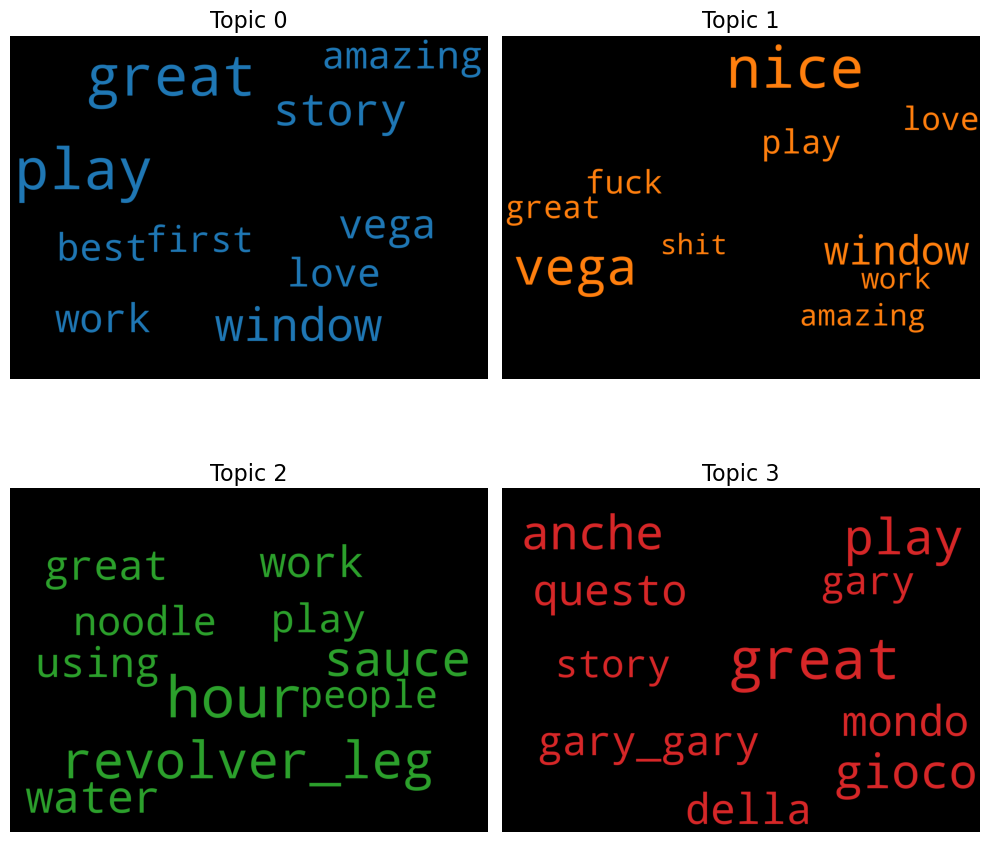

In [39]:
# Wordcloud of Top N words in each topic for fallout 3 yes

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout3_yes.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

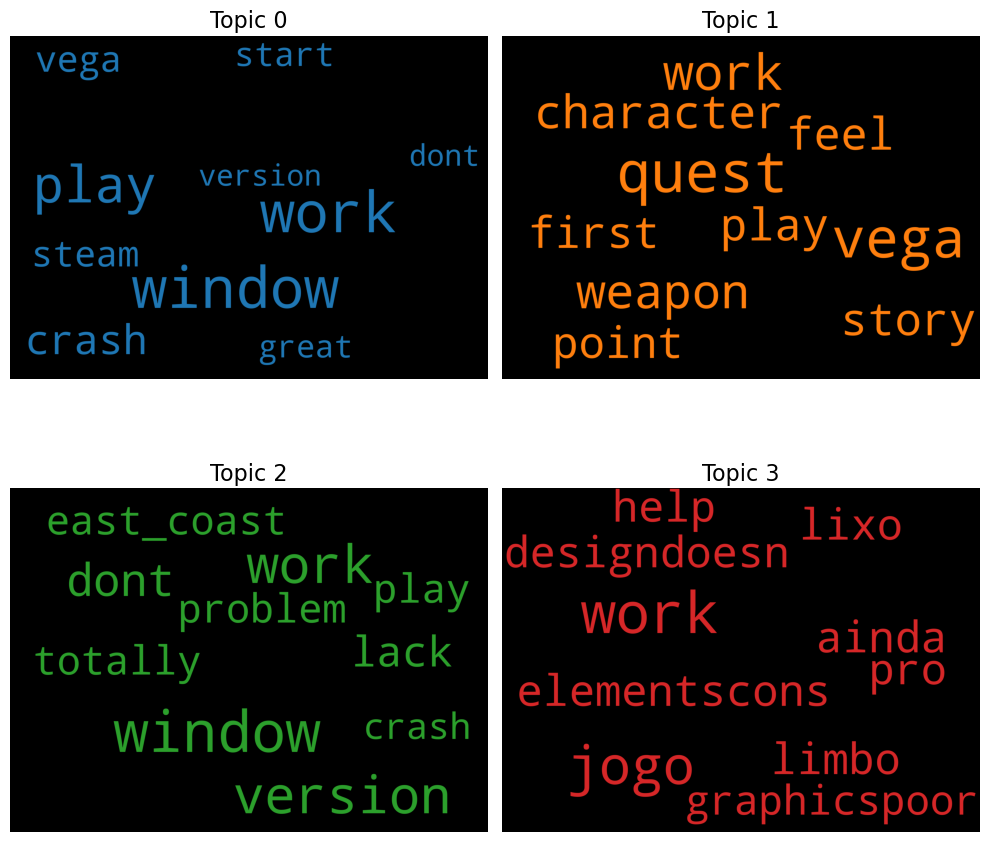

In [40]:
# Wordcloud of Top N words in each topic for fallout 3 no

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout3_no.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


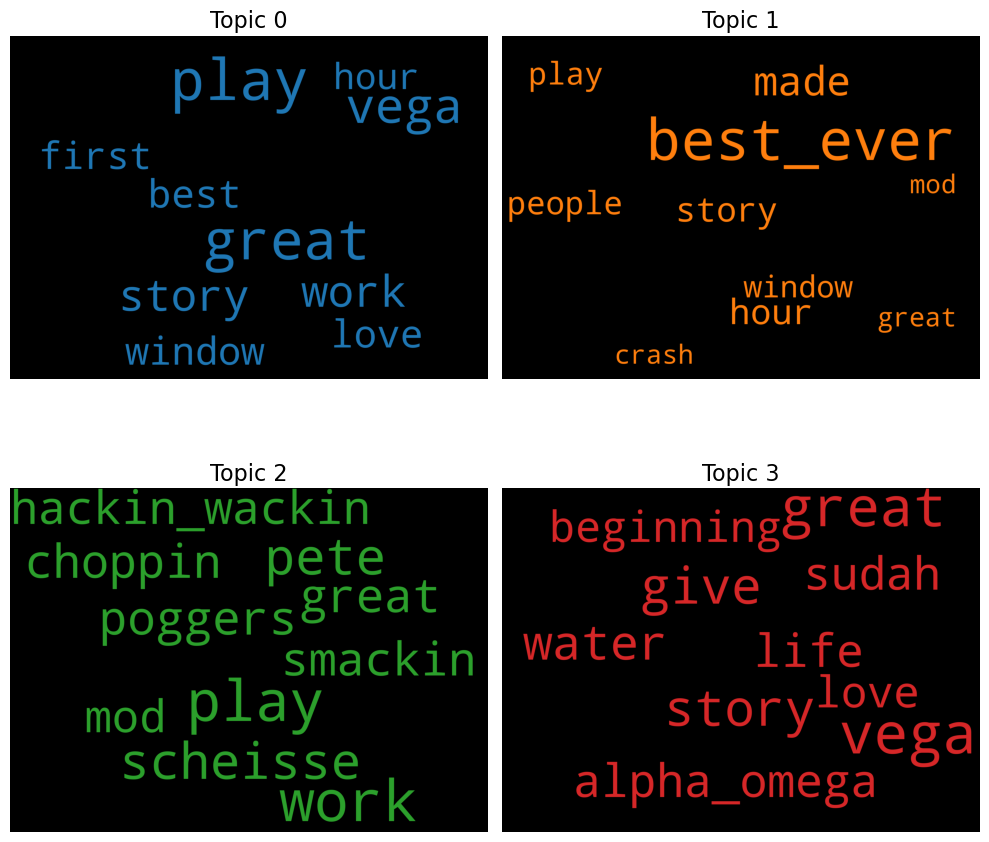

In [41]:
# Wordcloud of Top N words in each topic for fallout 3 goty yes

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout3_goty_yes.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


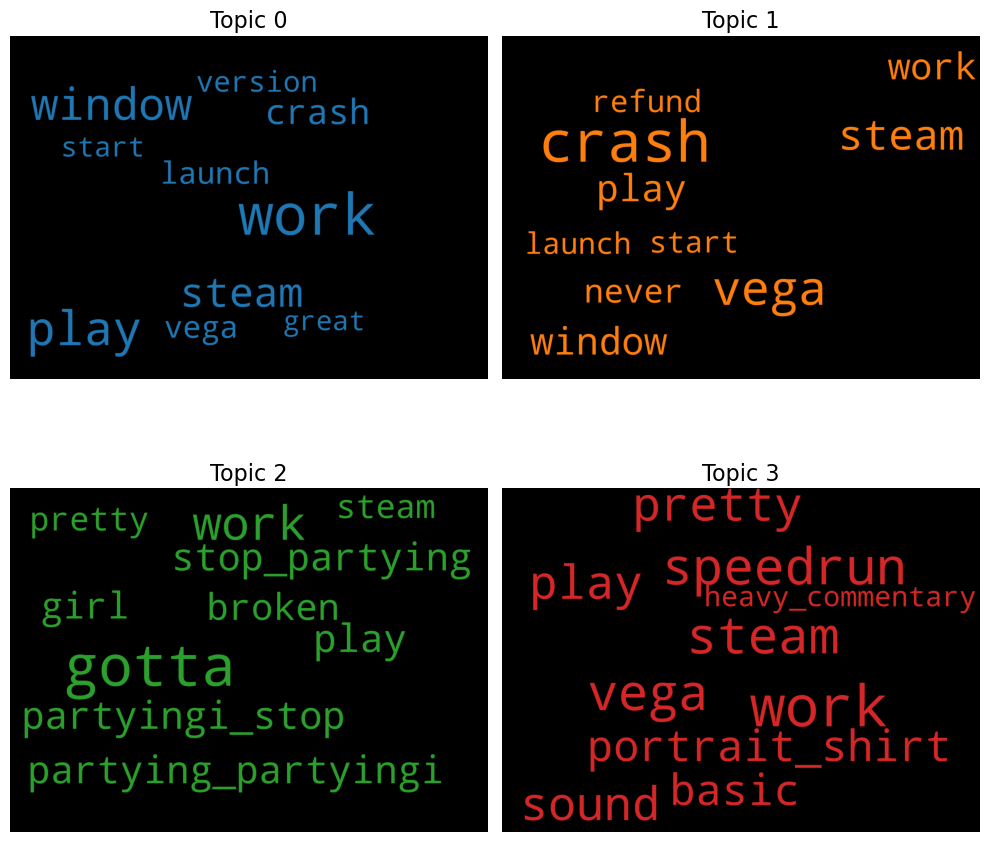

In [42]:
# Wordcloud of Top N words in each topic for fallout 3 goty no

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout3_goty_no.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


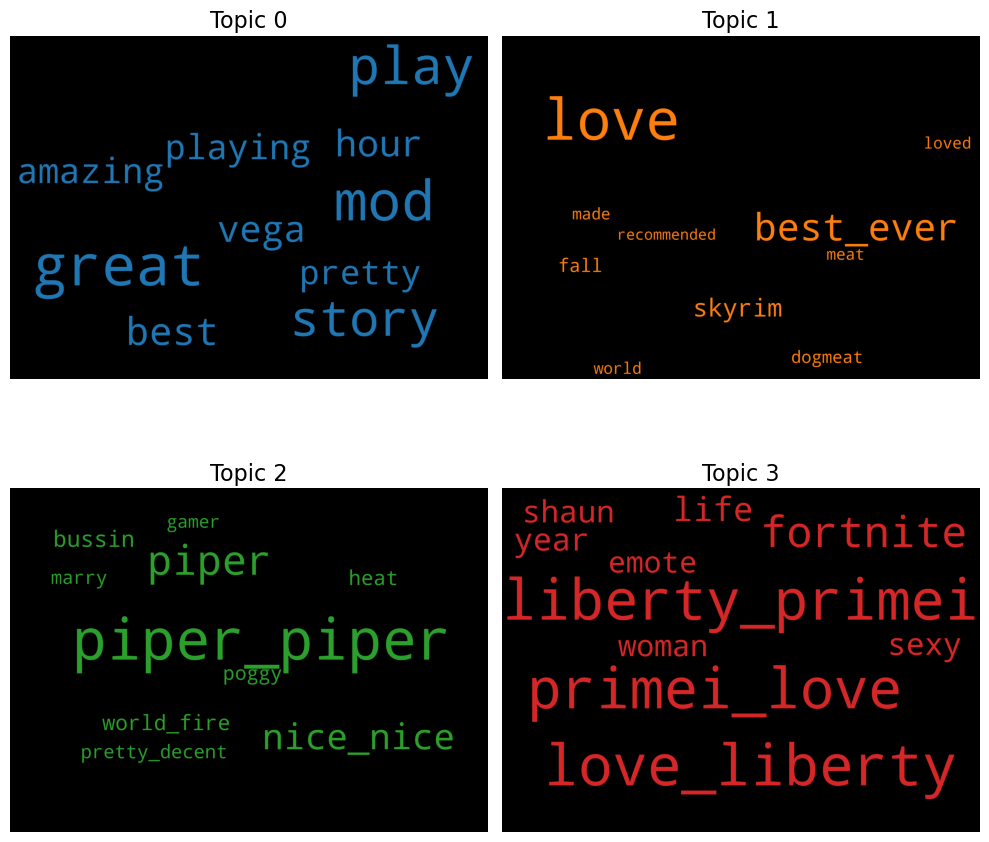

In [43]:
# Wordcloud of Top N words in each topic for fallout 4 yes

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout4_yes.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

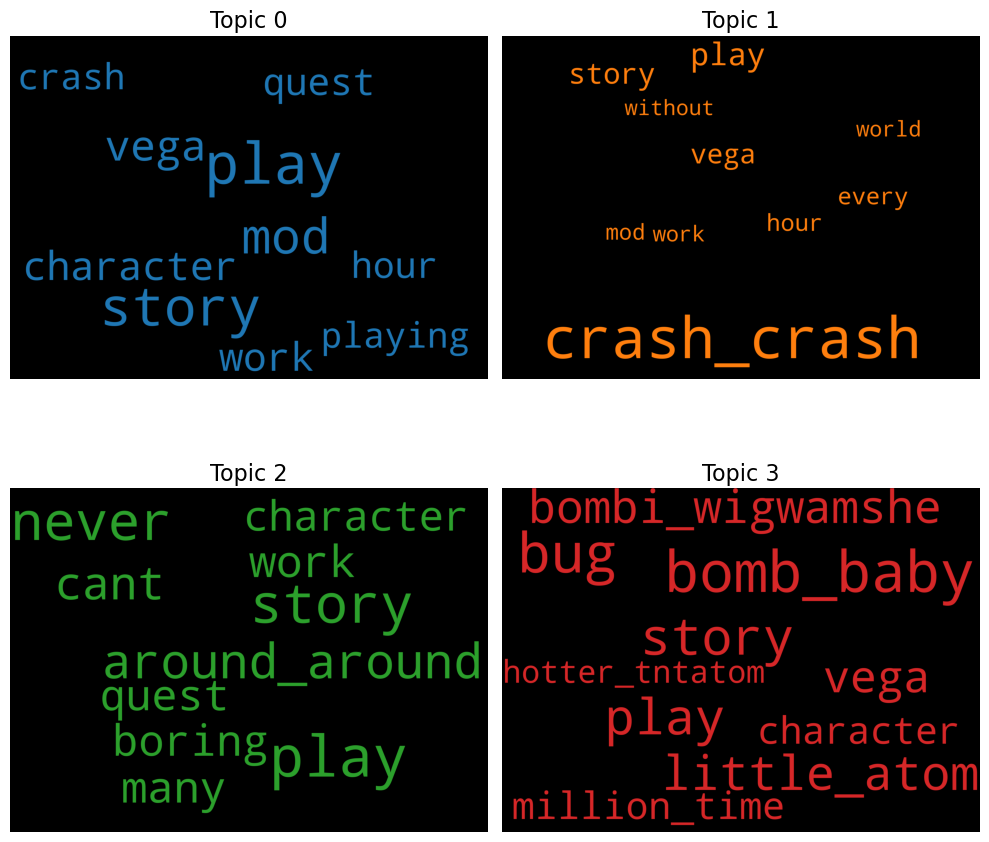

In [44]:
# Wordcloud of Top N words in each topic for fallout 4 no

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout4_no.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

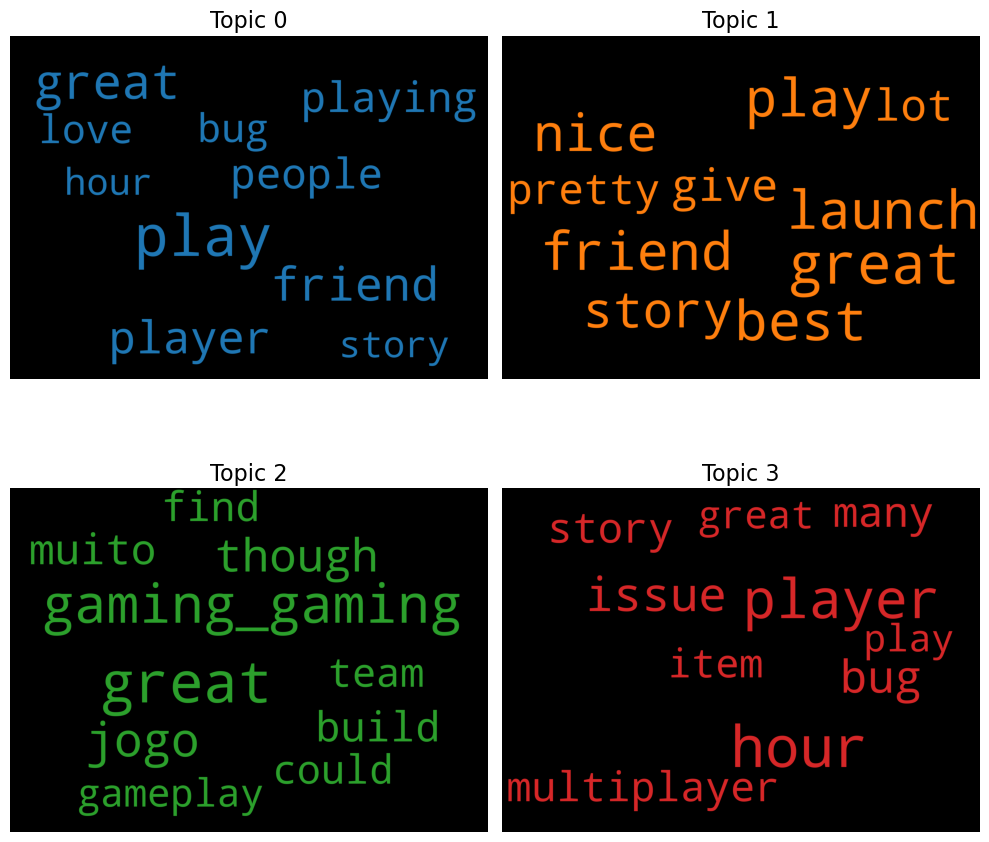

In [45]:
# Wordcloud of Top N words in each topic for fallout 76 yes

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout76_yes.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

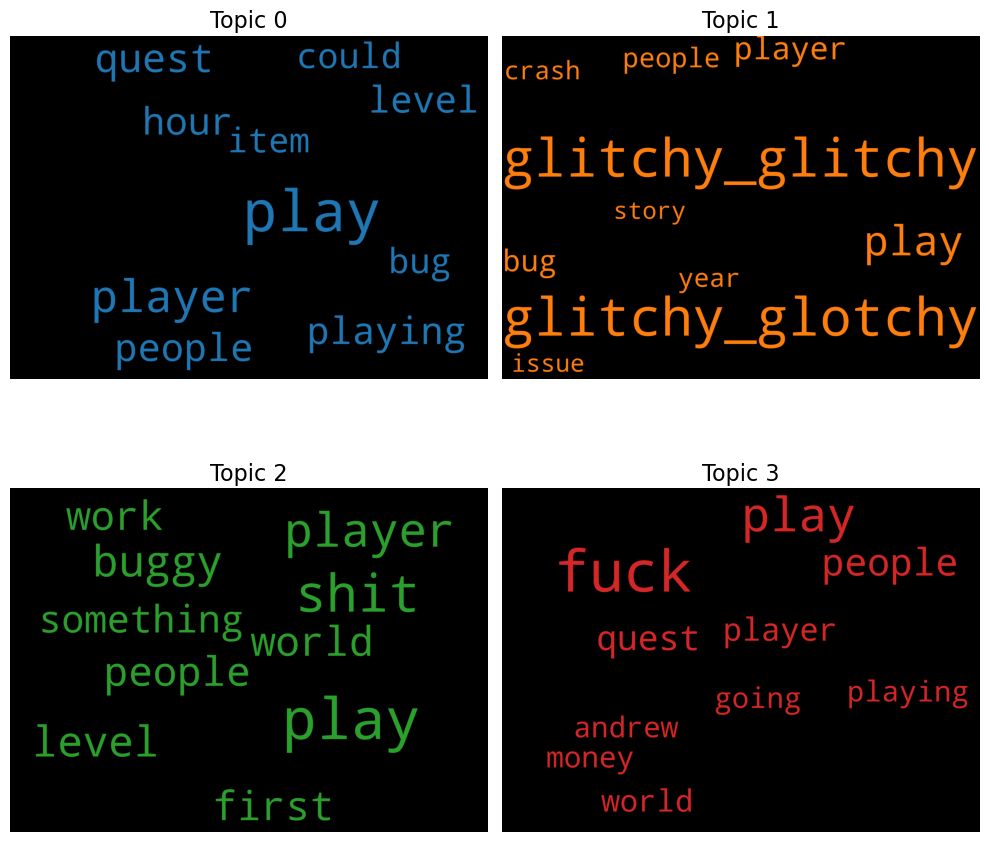

In [46]:
# Wordcloud of Top N words in each topic for fallout 76 no

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_fallout76_no.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

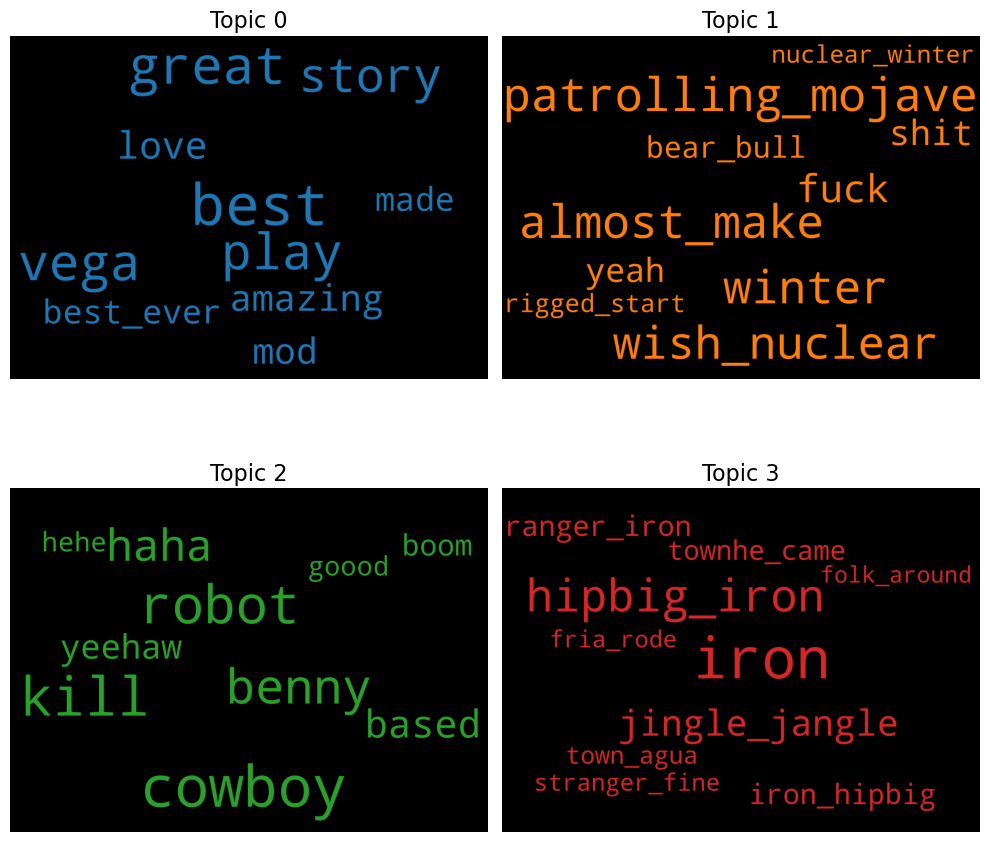

In [47]:
# Wordcloud of Top N words in each topic for fallout NV yes

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_falloutNV_yes.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

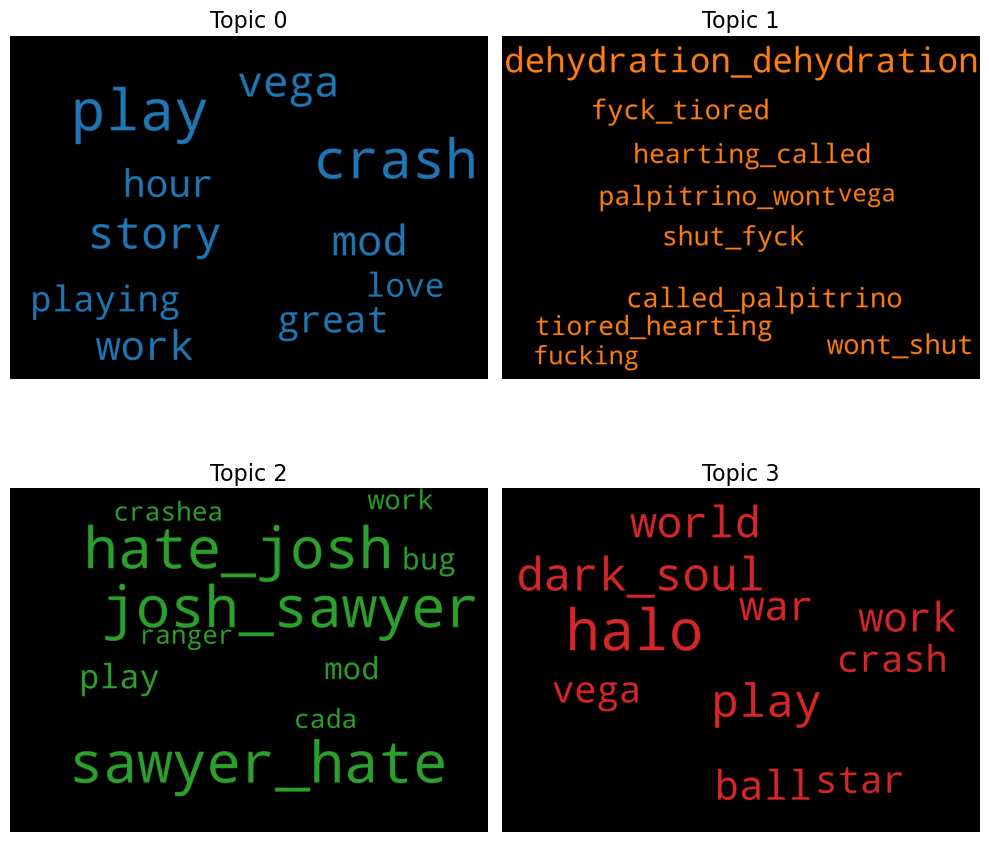

In [48]:
# Wordcloud of Top N words in each topic for fallout NV no

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_falloutNV_no.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

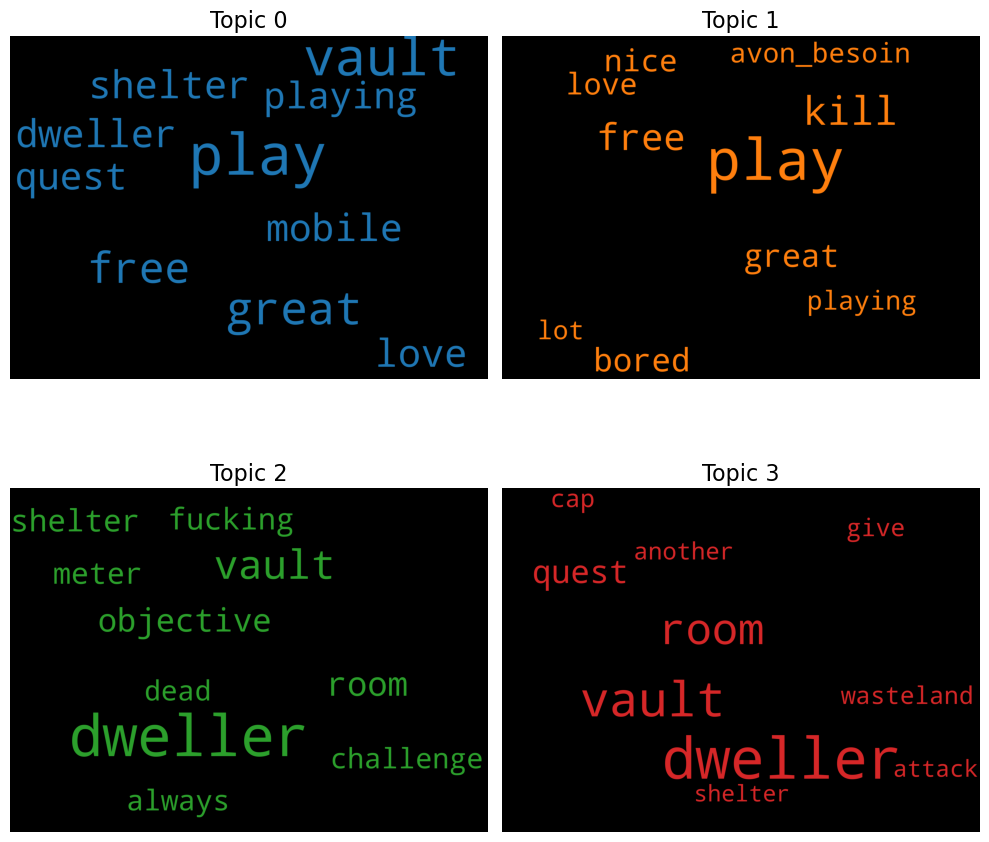

In [49]:
# Wordcloud of Top N words in each topic for fallout shelter yes

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_falloutS_yes.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\jocel\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

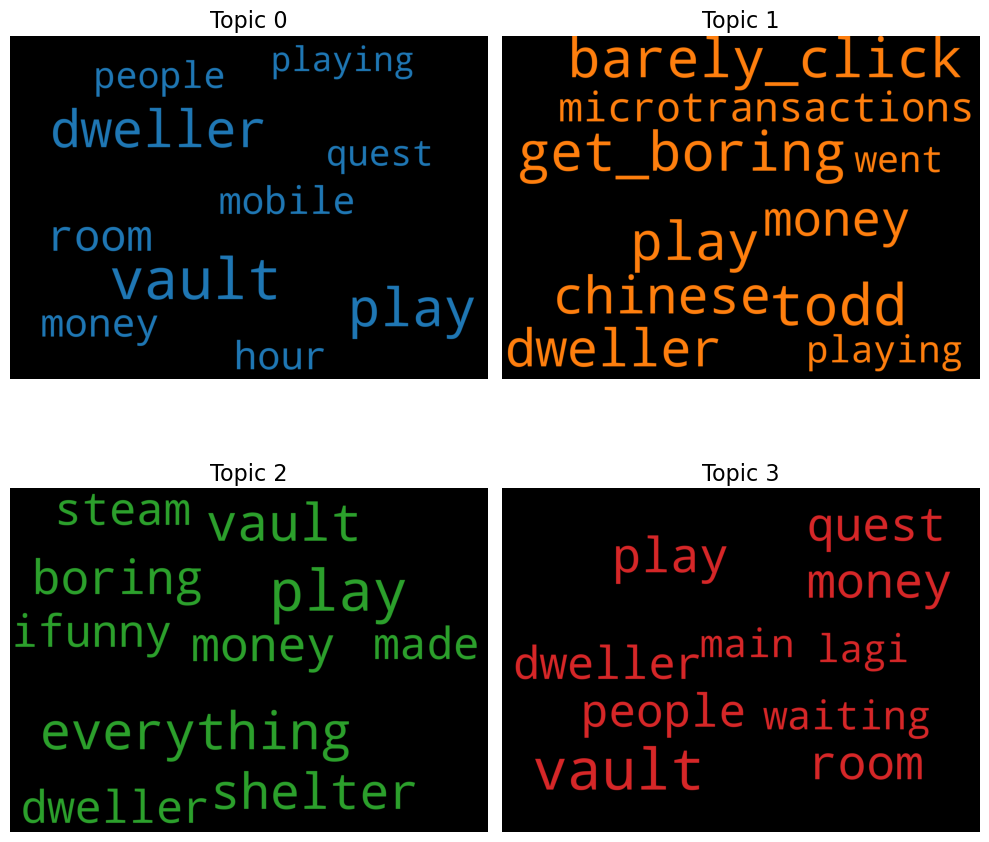

In [50]:
# Wordcloud of Top N words in each topic for fallout shelter no

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_falloutS_no.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()